In [1]:
!pip install retina-face

  Using cached retina_face-0.0.16-py3-none-any.whl (25 kB)


In [5]:
!pip install deepface

['Collecting deepface',
 '  Using cached deepface-0.0.89-py3-none-any.whl (94 kB)',
 'Requirement already satisfied: numpy>=1.14.0 in /usr/local/lib/python3.10/dist-packages (from deepface) (1.25.2)',
 'Requirement already satisfied: pandas>=0.23.4 in /usr/local/lib/python3.10/dist-packages (from deepface) (1.5.3)',
 'Requirement already satisfied: gdown>=3.10.1 in /usr/local/lib/python3.10/dist-packages (from deepface) (4.7.3)',
 'Requirement already satisfied: tqdm>=4.30.0 in /usr/local/lib/python3.10/dist-packages (from deepface) (4.66.2)',
 'Requirement already satisfied: Pillow>=5.2.0 in /usr/local/lib/python3.10/dist-packages (from deepface) (9.4.0)',
 'Requirement already satisfied: opencv-python>=4.5.5.64 in /usr/local/lib/python3.10/dist-packages (from deepface) (4.8.0.76)',
 'Requirement already satisfied: tensorflow>=1.9.0 in /usr/local/lib/python3.10/dist-packages (from deepface) (2.15.0)',
 'Requirement already satisfied: keras>=2.2.0 in /usr/local/lib/python3.10/dist-pack

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Importing Librares

In [8]:
import cv2
from retinaface import RetinaFace
from deepface import DeepFace
from google.colab.patches import cv2_imshow
import os
import tempfile

24-04-01 03:56:49 - Directory /root/.deepface created
24-04-01 03:56:49 - Directory /root/.deepface/weights created


In [9]:
# All the codes related to Face Processing is below
class FaceProcessor:
    def __init__(self, img_path=None):
        self.image = cv2.imread(img_path)
        if self.image is None:
            raise ValueError(f"Failed to load image from {img_path}. Please check the file path and permissions.")
        self.cropped_faces = []

    # Function to get the ranges of age
    @staticmethod
    def get_age_range(age):
        """Categorize exact age into age ranges."""
        if age < 20:
            return "0-19"
        elif age < 30:
            return "20-29"
        elif age < 40:
            return "30-39"
        elif age < 50:
            return "40-49"
        elif age < 60:
            return "50-59"
        else:
            return "60+"

    # Function to detect faces and crop them
    def detect_faces(self):
        if self.image is not None:
            # Use a temporary file to enable using RetinaFace with NumPy array
            with tempfile.NamedTemporaryFile(suffix=".jpg", delete=False) as tmp:
                cv2.imwrite(tmp.name, self.image)
                tmp_path = tmp.name

            faces = RetinaFace.detect_faces(tmp_path)

            # Cleanup temporary file
            os.remove(tmp_path)

            if faces:
                print(f"Number of faces detected: {len(faces)}")
                for face_key in faces:
                    coords = faces[face_key]["facial_area"]
                    self.cropped_faces.append(self.image[coords[1]:coords[3], coords[0]:coords[2]])
            else:
                print("No faces detected.")
        else:
            print("No image available for detection.")

    # Function to Analyze faces
    def analyze_faces(self):
        for i, face_img in enumerate(self.cropped_faces, start=1):
            try:
                analysis = DeepFace.analyze(face_img, actions=['age', 'gender'], enforce_detection=False)
                if isinstance(analysis, list):
                    analysis = analysis[0]

                gender_scores = analysis['gender']
                max_gender = max(gender_scores, key=gender_scores.get)
                gender = "Male" if max_gender == "Man" else "Female"
                age_range = self.get_age_range(analysis['age'])

                print(f"Face {i} Analysis: Age Range: {age_range}, Gender: {gender}")
                print(f"Displaying Face {i}")
                resized_face_img = cv2.resize(face_img, (244, 244))
                cv2_imshow(resized_face_img)
            except Exception as e:
                print(f"Analysis failed for face {i}: {e}")

    # Function when run it, do the both functions, detection and analyzing
    def process(self):
        self.detect_faces()
        self.analyze_faces()


In [10]:
# Function to do all the operations but not on a single image, on all the images in a directory
def process_directory(directory_path):
    for filename in os.listdir(directory_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(directory_path, filename)
            print(f"Processing {img_path}")
            face_processor = FaceProcessor(img_path=img_path)
            face_processor.process()

Processing /content/drive/MyDrive/Gender Classification Dataset/test/men/118.jpg
Number of faces detected: 1


Action: gender: 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]

Face 1 Analysis: Age Range: 20-29, Gender: Male
Displaying Face 1


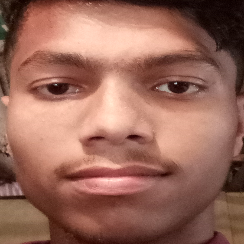

Processing /content/drive/MyDrive/Gender Classification Dataset/test/men/110.jpg
Number of faces detected: 1


Action: gender: 100%|██████████| 2/2 [00:01<00:00,  1.15it/s]

Face 1 Analysis: Age Range: 30-39, Gender: Male
Displaying Face 1


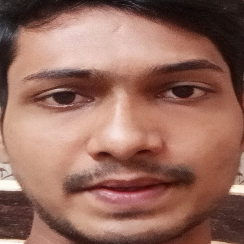

Processing /content/drive/MyDrive/Gender Classification Dataset/test/men/115.jpg
Number of faces detected: 1


Action: gender: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]

Face 1 Analysis: Age Range: 30-39, Gender: Male
Displaying Face 1


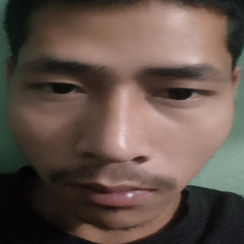

Processing /content/drive/MyDrive/Gender Classification Dataset/test/men/117.jpg
Number of faces detected: 1


Action: gender: 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]

Face 1 Analysis: Age Range: 20-29, Gender: Male
Displaying Face 1


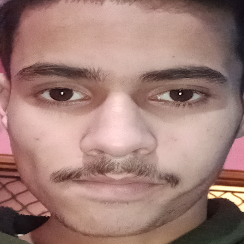

Processing /content/drive/MyDrive/Gender Classification Dataset/test/men/112.jpg
Number of faces detected: 1


Action: gender: 100%|██████████| 2/2 [00:01<00:00,  1.31it/s]

Face 1 Analysis: Age Range: 30-39, Gender: Male
Displaying Face 1


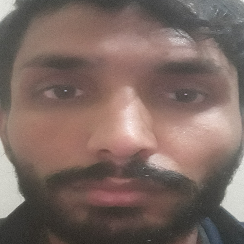

Processing /content/drive/MyDrive/Gender Classification Dataset/test/men/116.jpg
Number of faces detected: 1


Action: gender: 100%|██████████| 2/2 [00:01<00:00,  1.10it/s]

Face 1 Analysis: Age Range: 30-39, Gender: Male
Displaying Face 1


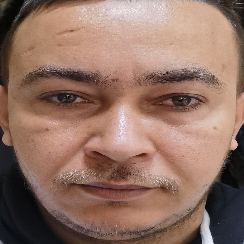

Processing /content/drive/MyDrive/Gender Classification Dataset/test/men/113.jpg
Number of faces detected: 1


Action: gender: 100%|██████████| 2/2 [00:01<00:00,  1.37it/s]

Face 1 Analysis: Age Range: 30-39, Gender: Male
Displaying Face 1


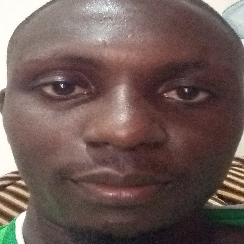

Processing /content/drive/MyDrive/Gender Classification Dataset/test/men/114.jpg
Number of faces detected: 1


Action: gender: 100%|██████████| 2/2 [00:01<00:00,  1.37it/s]

Face 1 Analysis: Age Range: 20-29, Gender: Male
Displaying Face 1


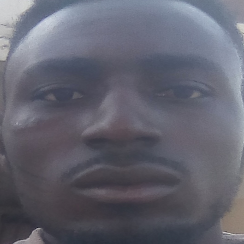

Processing /content/drive/MyDrive/Gender Classification Dataset/test/men/111.jpg
Number of faces detected: 1


Action: gender: 100%|██████████| 2/2 [00:01<00:00,  1.15it/s]

Face 1 Analysis: Age Range: 30-39, Gender: Male
Displaying Face 1


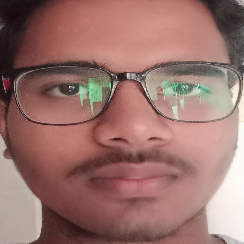

Processing /content/drive/MyDrive/Gender Classification Dataset/test/men/131.jpg
Number of faces detected: 1


Action: gender: 100%|██████████| 2/2 [00:01<00:00,  1.19it/s]

Face 1 Analysis: Age Range: 20-29, Gender: Male
Displaying Face 1


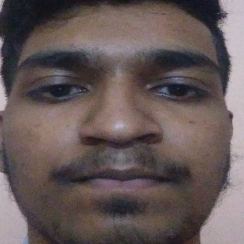

Processing /content/drive/MyDrive/Gender Classification Dataset/test/men/122.jpg
Number of faces detected: 1


Action: gender: 100%|██████████| 2/2 [00:01<00:00,  1.19it/s]

Face 1 Analysis: Age Range: 20-29, Gender: Male
Displaying Face 1


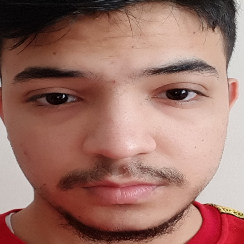

Processing /content/drive/MyDrive/Gender Classification Dataset/test/men/124.jpg
Number of faces detected: 2


Action: gender: 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]

Face 1 Analysis: Age Range: 30-39, Gender: Male
Displaying Face 1


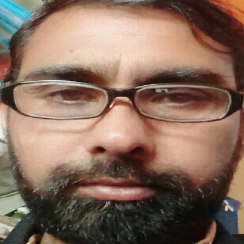

Action: gender: 100%|██████████| 2/2 [00:01<00:00,  1.48it/s]

Face 2 Analysis: Age Range: 20-29, Gender: Male
Displaying Face 2


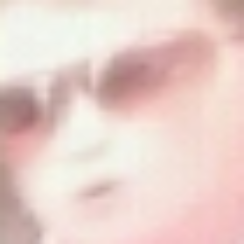

Processing /content/drive/MyDrive/Gender Classification Dataset/test/men/127.jpg
Number of faces detected: 1


Action: gender: 100%|██████████| 2/2 [00:01<00:00,  1.29it/s]

Face 1 Analysis: Age Range: 20-29, Gender: Male
Displaying Face 1


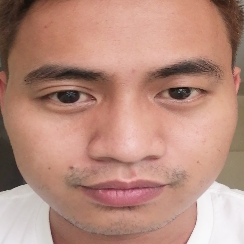

Processing /content/drive/MyDrive/Gender Classification Dataset/test/men/125.jpg
Number of faces detected: 1


Action: gender: 100%|██████████| 2/2 [00:01<00:00,  1.48it/s]

Face 1 Analysis: Age Range: 20-29, Gender: Male
Displaying Face 1


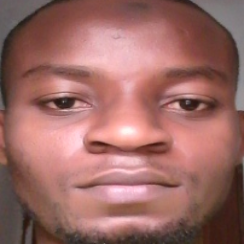

Processing /content/drive/MyDrive/Gender Classification Dataset/test/men/130.jpg
Number of faces detected: 1


Action: gender: 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]

Face 1 Analysis: Age Range: 20-29, Gender: Male
Displaying Face 1


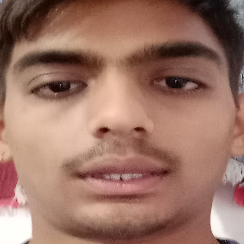

Processing /content/drive/MyDrive/Gender Classification Dataset/test/men/119.jpg
Number of faces detected: 1


Action: gender: 100%|██████████| 2/2 [00:01<00:00,  1.02it/s]

Face 1 Analysis: Age Range: 30-39, Gender: Male
Displaying Face 1


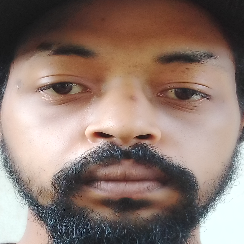

Processing /content/drive/MyDrive/Gender Classification Dataset/test/men/120.jpg
Number of faces detected: 1


Action: gender: 100%|██████████| 2/2 [00:01<00:00,  1.48it/s]

Face 1 Analysis: Age Range: 20-29, Gender: Male
Displaying Face 1


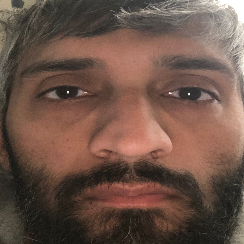

Processing /content/drive/MyDrive/Gender Classification Dataset/test/men/128.jpg
Number of faces detected: 1


Action: gender: 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]

Face 1 Analysis: Age Range: 40-49, Gender: Male
Displaying Face 1


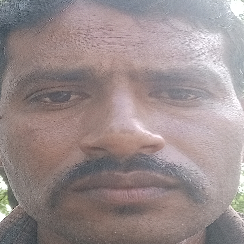

Processing /content/drive/MyDrive/Gender Classification Dataset/test/men/126.jpg
Number of faces detected: 1


Action: gender: 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]

Face 1 Analysis: Age Range: 20-29, Gender: Male
Displaying Face 1


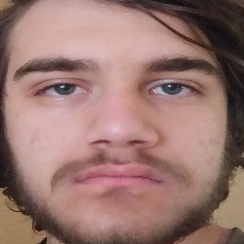

Processing /content/drive/MyDrive/Gender Classification Dataset/test/men/123.jpg
Number of faces detected: 1


Action: gender: 100%|██████████| 2/2 [00:01<00:00,  1.48it/s]

Face 1 Analysis: Age Range: 20-29, Gender: Male
Displaying Face 1


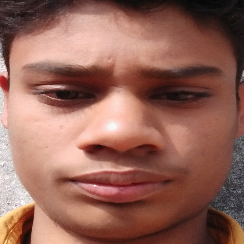

Processing /content/drive/MyDrive/Gender Classification Dataset/test/men/121.jpg
Number of faces detected: 1


Action: gender: 100%|██████████| 2/2 [00:01<00:00,  1.45it/s]

Face 1 Analysis: Age Range: 30-39, Gender: Male
Displaying Face 1


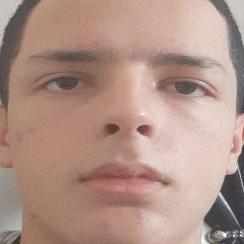

Processing /content/drive/MyDrive/Gender Classification Dataset/test/men/129.jpg
Number of faces detected: 1


Action: gender: 100%|██████████| 2/2 [00:01<00:00,  1.10it/s]

Face 1 Analysis: Age Range: 20-29, Gender: Male
Displaying Face 1


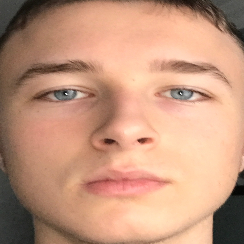

Processing /content/drive/MyDrive/Gender Classification Dataset/test/men/140.jpg
Number of faces detected: 1


Action: gender: 100%|██████████| 2/2 [00:01<00:00,  1.48it/s]

Face 1 Analysis: Age Range: 30-39, Gender: Male
Displaying Face 1


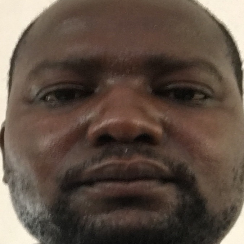

Processing /content/drive/MyDrive/Gender Classification Dataset/test/men/136.jpg
Number of faces detected: 1


Action: gender: 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]

Face 1 Analysis: Age Range: 30-39, Gender: Male
Displaying Face 1


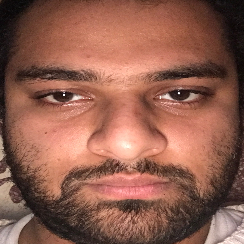

Processing /content/drive/MyDrive/Gender Classification Dataset/test/men/137.jpg
Number of faces detected: 1


Action: gender: 100%|██████████| 2/2 [00:02<00:00,  1.22s/it]

Face 1 Analysis: Age Range: 30-39, Gender: Male
Displaying Face 1


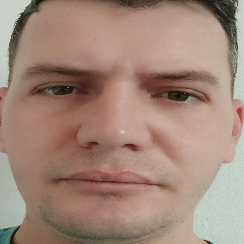

Processing /content/drive/MyDrive/Gender Classification Dataset/test/men/132.jpg
Number of faces detected: 1


Action: gender: 100%|██████████| 2/2 [00:01<00:00,  1.44it/s]

Face 1 Analysis: Age Range: 30-39, Gender: Male
Displaying Face 1


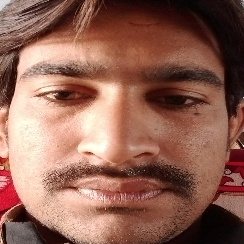

Processing /content/drive/MyDrive/Gender Classification Dataset/test/men/143.jpg
Number of faces detected: 1


Action: gender: 100%|██████████| 2/2 [00:01<00:00,  1.46it/s]

Face 1 Analysis: Age Range: 30-39, Gender: Male
Displaying Face 1


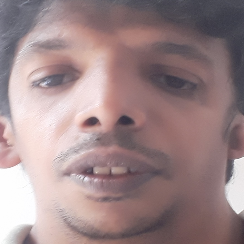

Processing /content/drive/MyDrive/Gender Classification Dataset/test/men/141.jpg
Number of faces detected: 1


Action: gender: 100%|██████████| 2/2 [00:02<00:00,  1.01s/it]

Face 1 Analysis: Age Range: 40-49, Gender: Male
Displaying Face 1


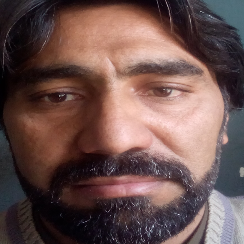

Processing /content/drive/MyDrive/Gender Classification Dataset/test/men/133.jpg
Number of faces detected: 1


Action: gender: 100%|██████████| 2/2 [00:02<00:00,  1.10s/it]

Face 1 Analysis: Age Range: 20-29, Gender: Male
Displaying Face 1


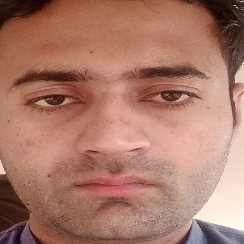

Processing /content/drive/MyDrive/Gender Classification Dataset/test/men/138.jpg
Number of faces detected: 1


Action: gender: 100%|██████████| 2/2 [00:02<00:00,  1.09s/it]

Face 1 Analysis: Age Range: 20-29, Gender: Male
Displaying Face 1


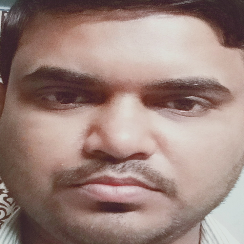

Processing /content/drive/MyDrive/Gender Classification Dataset/test/men/142.jpg
Number of faces detected: 1


Action: gender: 100%|██████████| 2/2 [00:01<00:00,  1.44it/s]

Face 1 Analysis: Age Range: 30-39, Gender: Male
Displaying Face 1


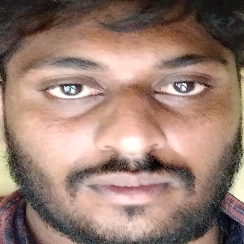

Processing /content/drive/MyDrive/Gender Classification Dataset/test/men/134.jpg
Number of faces detected: 1


Action: gender: 100%|██████████| 2/2 [00:01<00:00,  1.44it/s]

Face 1 Analysis: Age Range: 30-39, Gender: Male
Displaying Face 1


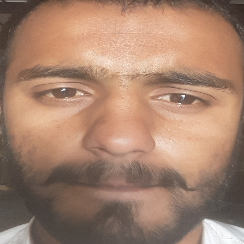

Processing /content/drive/MyDrive/Gender Classification Dataset/test/men/144.jpg
Number of faces detected: 1


Action: gender: 100%|██████████| 2/2 [00:01<00:00,  1.45it/s]

Face 1 Analysis: Age Range: 20-29, Gender: Male
Displaying Face 1


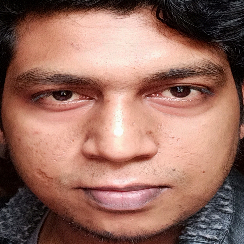

Processing /content/drive/MyDrive/Gender Classification Dataset/test/men/139.jpg
Number of faces detected: 1


Action: gender: 100%|██████████| 2/2 [00:01<00:00,  1.43it/s]

Face 1 Analysis: Age Range: 30-39, Gender: Male
Displaying Face 1


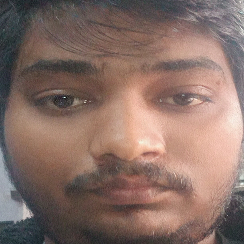

Processing /content/drive/MyDrive/Gender Classification Dataset/test/men/135.jpg
Number of faces detected: 1


Action: gender: 100%|██████████| 2/2 [00:02<00:00,  1.11s/it]

Face 1 Analysis: Age Range: 30-39, Gender: Male
Displaying Face 1


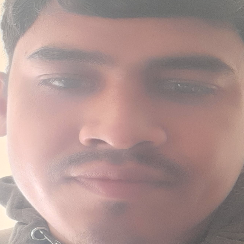

Processing /content/drive/MyDrive/Gender Classification Dataset/test/men/149.jpg
Number of faces detected: 1


Action: gender: 100%|██████████| 2/2 [00:01<00:00,  1.44it/s]

Face 1 Analysis: Age Range: 20-29, Gender: Male
Displaying Face 1


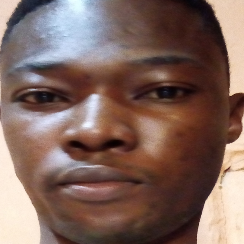

Processing /content/drive/MyDrive/Gender Classification Dataset/test/men/148.jpg
Number of faces detected: 1


Action: gender: 100%|██████████| 2/2 [00:01<00:00,  1.45it/s]

Face 1 Analysis: Age Range: 30-39, Gender: Male
Displaying Face 1


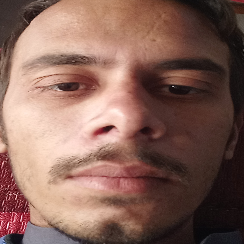

Processing /content/drive/MyDrive/Gender Classification Dataset/test/men/145.jpg
Number of faces detected: 1


Action: gender: 100%|██████████| 2/2 [00:01<00:00,  1.40it/s]

Face 1 Analysis: Age Range: 30-39, Gender: Male
Displaying Face 1


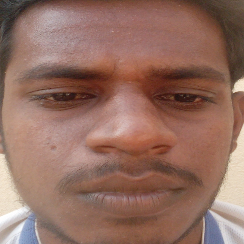

Processing /content/drive/MyDrive/Gender Classification Dataset/test/men/146.jpg
Number of faces detected: 1


Action: gender: 100%|██████████| 2/2 [00:02<00:00,  1.09s/it]

Face 1 Analysis: Age Range: 30-39, Gender: Male
Displaying Face 1


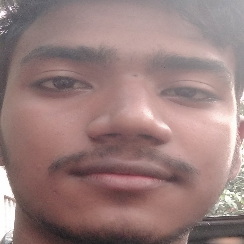

Processing /content/drive/MyDrive/Gender Classification Dataset/test/men/147.jpg
Number of faces detected: 1


Action: gender: 100%|██████████| 2/2 [00:01<00:00,  1.01it/s]

Face 1 Analysis: Age Range: 20-29, Gender: Male
Displaying Face 1


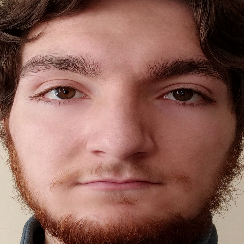

In [14]:
# Analysis all the files in the directory
directory_path = '/content/drive/MyDrive/Gender Classification Dataset/test/men'
process_directory(directory_path)

Number of faces detected: 1


Action: gender: 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]

Face 1 Analysis: Age Range: 20-29, Gender: Male
Displaying Face 1


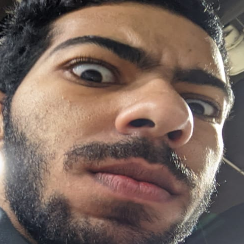

In [13]:
# Analysis Single Image
img_path = '/content/WhatsApp Image 2024-03-31 at 09.19.50_98fe2d03.jpg'
face_processor = FaceProcessor(img_path)
face_processor.process()